In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import leaves_list

In [2]:
feat_fn = sorted(glob.glob(os.path.join('..', 'data', 'features', 'biomart', '*.csv')))
feat_dict = {os.path.split(fn)[1].replace('.csv', '') : fn for fn in feat_fn if 'union' not in fn}
for key in feat_dict:
    feat_dict[key] = pd.read_csv(feat_dict[key])
    print(key, feat_dict[key])

EMTHallmark     hsapiens mmusculus
0      POSTN     Postn
1       SGCG      Sgcg
2     PMEPA1    Pmepa1
3       CDH2      Cdh2
4       MSX1      Msx1
..       ...       ...
199     FMOD      Fmod
200  COL11A1   Col11a1
201     RGS4      Rgs4
202      JUN       Jun
203    VCAM1     Vcam1

[204 rows x 2 columns]
GSE136689    mmusculus hsapiens
0      Map1b    MAP1B
1       Irx1     IRX1
2        Id2      ID2
3     Homer2   HOMER2
4        Clu      CLU
..       ...      ...
67     Aldoa    ALDOA
68       Mmd      MMD
69      Peg3     PEG3
70   Slc16a3  SLC16A3
71    Mpped2   MPPED2

[72 rows x 2 columns]
GSE162534     mmusculus  hsapiens
0        Cdh2      CDH2
1       Greb1     GREB1
2        Sqle      SQLE
3    Tnfrsf19  TNFRSF19
4       Rspo3     RSPO3
..        ...       ...
201      Cst3      CST3
202    Mogat2    MOGAT2
203  Serpinh1  SERPINH1
204       Sp5       SP5
205      Peg3      PEG3

[206 rows x 2 columns]
GSE201257     mmusculus hsapiens
0     Phactr1  PHACTR1
1       Vcam1

In [4]:
jac = pd.DataFrame(0., index = feat_dict.keys(), columns = feat_dict.keys())
for ix in jac.columns:
    g1 = set(feat_dict[ix].mmusculus)
    for jx in jac.columns:
        g2 = set(feat_dict[jx].mmusculus)
        jac.loc[ix, jx] = len(g1 & g2) / len(g1 | g2)

method = 'complete'
Z = linkage(jac, method = method, optimal_ordering = True)
jac = jac.iloc[leaves_list(Z), leaves_list(Z)]

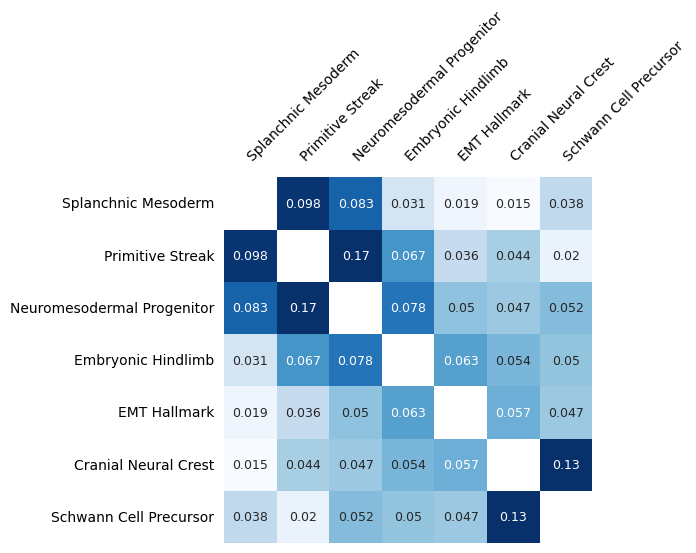

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (4.75, 4.75))
sns.heatmap(
    jac,
    mask = np.eye(jac.shape[0]),
    cmap = 'Blues',
    vmax = .1,
    annot = True,
    annot_kws = {'fontsize' : 9},
    cbar = False,
    ax = ax)

summary_df = pd.read_csv(os.path.join('..', 'data', 'summary.csv'), index_col = 0).sort_index()
ticklabels = pd.Series([label.get_text() for label in ax.get_yticklabels()])
ticklabels = ticklabels.map(summary_df.Name.to_dict()).values
ax.set_yticklabels(ticklabels, size = 10)
ax.set_xticklabels(ticklabels, size = 10, rotation = 45, rotation_mode = 'anchor', ha = 'left', va = 'center')
ax.tick_params('y', right = False, labelright = False, labelleft = True, left = False)
ax.tick_params('x', bottom = False, labelbottom = False, labeltop = True, pad = 10)
plt.show()